# Homework 4 - Part 2
## Least-squares linear classifier for multiple classes
Run the least-squares linear discriminant code shown in class on the Iris dataset (http://en.wikipedia.org/wiki/Iris_flower_data_set/)

It has three classes and four features. You may use all of the data for training.

Show the three 2D scatter plots $[w^𝑇_1 x, w^𝑇_2 x]$ , $[w^𝑇_1 x, w^𝑇_3 x]$ and $[w^𝑇_2 x, w^𝑇_3 x]$ where you plot all the training set data in each scatter plot. There is no test data set. Comment on the nature of the plot.

## Importing libraries and data

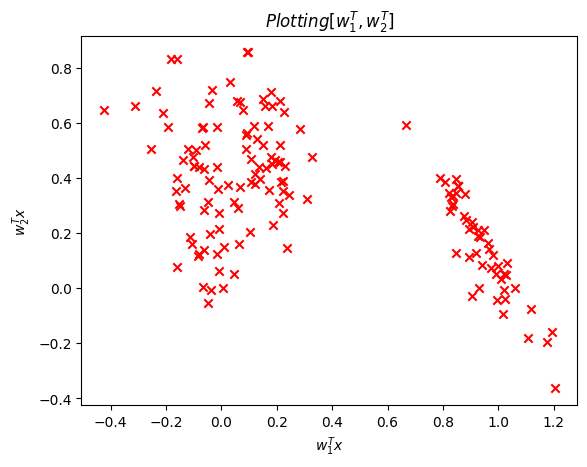

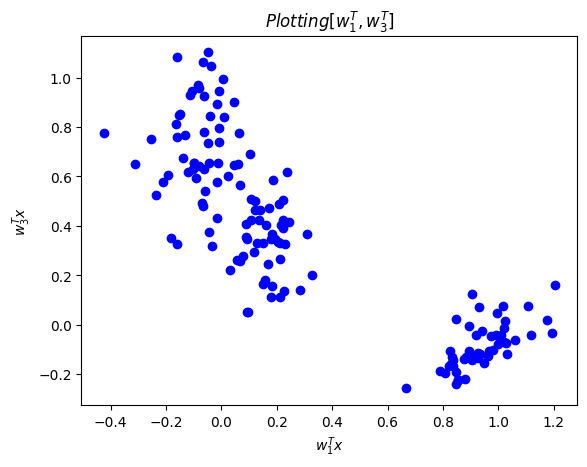

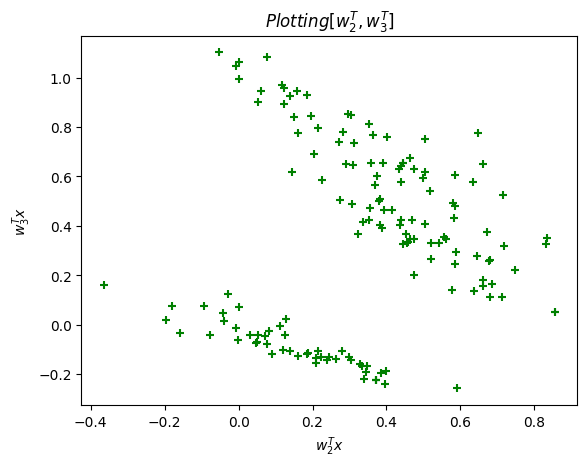

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Read Data
df = pd.read_csv("./Data/Iris.csv").set_index("Id")
X = df.iloc[:,:4].values.T

# Define Y (labels/species)
species = df["Species"]
labels_1 = (species.values == species.value_counts().reset_index()["index"][0]).astype(int).flatten()
labels_2 = (species.values == species.value_counts().reset_index()["index"][1]).astype(int).flatten()
labels_3 = (species.values == species.value_counts().reset_index()["index"][2]).astype(int).flatten()
Y = np.zeros((X.shape[0]-1,X.shape[1]))
Y[0] = labels_1
Y[1] = labels_2
Y[2] = labels_3

# Adding a bias row of ones to feature vectors (very very important)
X = np.append(X,[np.ones(Y.sum().astype(int))],axis=0)
# The solution for W obtained via linear algebra
W = la.inv(X @ X.T) @ (X @ Y.T)

# Creating X and Y axis for scatter plots
wt1x = W[:,0].T @ X
wt2x = W[:,1].T @ X
wt3x = W[:,2].T @ X

# Plotting
plt.figure()
plt.xlabel("$w_1^Tx$")
plt.ylabel("$w_2^Tx$")
plt.title("$Plotting [w_1^T, w_2^T]$")
plt.scatter(wt1x, wt2x,color="red",marker="x")
plt.show()

plt.figure()
plt.xlabel("$w_1^Tx$")
plt.ylabel("$w_3^Tx$")
plt.title("$Plotting [w_1^T, w_3^T]$")
plt.scatter(wt1x, wt3x,color="blue",marker="o")
plt.show()

plt.figure()
plt.xlabel("$w_2^Tx$")
plt.ylabel("$w_3^Tx$")
plt.title("$Plotting [w_2^T, w_3^T]$")
plt.scatter(wt2x, wt3x,color="green",marker="+")
plt.show()

### Comment about the plots
Each axis is the result of running X, the input, through the weights of a specific class. The result will be 150 values. Each value is the addition of all the weights of the class multiplied by the features of each sample (plus the bias).

The result will be a single value that one usually compares with another to find out which class one falls back on.

The scatter plot itself shows 2 numbers for each sample:
- Its probability of being on the weights used in the x-axis
- Its probability of being on the weights used in the y-axis

The result, as you might not expect, are three clusters (instead of the two clusters that one would trivially assume.)

The first cluster has the x-axis close to 1 and the y-axis close to 0 (that means the label is the one that was used to make the $w^Tx$ used in the x-axis). The second one has x-axis close to 0 and y-axis close to 1 (applying same logic). The third one is near the origin (it is not the class used in either axes).